# UFCFVQ-15-M Programming for Data Science
# Programming Task 2

## Student Id: 20031200

### Libraries ###

In [1]:
# # Install Libraries if not exists
import sys
import subprocess
import pkg_resources

required = {'pandas', 'functools','pprint','numpy','matplotlib','seaborn','scipy'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

# Import Libraries
import os
import pandas as pd
from functools import reduce
from pprint import pprint
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Requirement FR2.1 - Read CSV data from a file (with a header row) into memory 
1. Used read\_csv function from the pandas library
2. The First column &quot;unnamed&quot; with index values is present while reading the csv file.
3. To resolve this, I&#39;m considering the unnamed column as the index while reading the CSV File.
4. Loaded them as DataFrame.

In [2]:
'''
The First column "unnamed" with index values is present while reading the csv file. 
To resolve this, I'm considering the unnamed column as the index while reading the CSV file
'''
file_path = 'data/task2a.csv'
input_data_task2a = pd.read_csv(file_path, index_col=[0])
input_data_task2a.head()

,id_student,gender,region,highest_education,age_band,disability,final_result,score
0,11391,M,East Anglian Region,HE Qualification,55<=,N,Pass,82.0
1,28400,F,Scotland,HE Qualification,35-55,N,Pass,67.0
2,31604,F,South East Region,A Level or Equivalent,35-55,N,Pass,76.0
3,32885,F,West Midlands Region,Lower Than A Level,0-35,N,Pass,55.0
4,38053,M,Wales,A Level or Equivalent,35-55,N,Pass,68.0


### Requirement FR2.2 - Read CSV data from a file (without a header row) into memory
1. Used read\_csv function from the Pandas library.
2. Mentioned the column names in the parameter &#39;name&#39;.
3. Loaded them as DataFrame.

In [3]:
'''
Using name parameter, I'm adding the column names
'''
file_path = 'data/task2b.csv'
input_data_task2b = pd.read_csv(file_path,names=['id_student','click_events'])
input_data_task2b.head()

,id_student,click_events
0,6516,2791.0
1,8462,656.0
2,11391,934.0
3,23629,NaN
4,23698,910.0


### Requirement FR2.3 - Merge the data from two Dataframes
1. Loaded the two data frames from List.
2. I wanted to do an efficient merging and prevent the duplicates along the way.
3. So used pandas merge with outer and mapped them using lambda and reduce for the list of data frames.

In [4]:
'''
loading dataframes as a list
merging on "id_student" and preventing duplicates
'''

data_frames = [input_data_task2a,input_data_task2b]

input_data_merged = reduce(lambda  left,right: pd.merge(left,right,on=['id_student'],
                                            how='outer'), data_frames)

input_data_merged.head()

,id_student,gender,region,highest_education,age_band,disability,final_result,score,click_events
0,11391,M,East Anglian Region,HE Qualification,55<=,N,Pass,82.0,934.0
1,28400,F,Scotland,HE Qualification,35-55,N,Pass,67.0,1435.0
2,31604,F,South East Region,A Level or Equivalent,35-55,N,Pass,76.0,2158.0
3,32885,F,West Midlands Region,Lower Than A Level,0-35,N,Pass,55.0,1034.0
4,38053,M,Wales,A Level or Equivalent,35-55,N,Pass,68.0,2445.0


### Requirement FR2.4 - Remove any rows that contain missing values
1. Before removing empty values, I wanted to check if there are any empty values.
2. If there are any, then removed those using dropna with any if any null values are found.
3. Then rechecked if there are any empty values.

In [5]:
# Check for empty values
display(input_data_merged.isna().sum(axis=0))

input_data_merged_cleaned = input_data_merged.dropna(how='any')

# Check for empty values
display(input_data_merged_cleaned.isna().sum(axis=0))

id_student              0
gender               2730
region               2730
highest_education    2730
age_band             2730
disability           2730
final_result         2730
score                2749
click_events         1540
dtype: int64

id_student           0
gender               0
region               0
highest_education    0
age_band             0
disability           0
final_result         0
score                0
click_events         0
dtype: int64

### Requirement FR2.5 - Filter out unnecessary rows
1. Before removing empty values, I wanted to check if there click\_events satisfying the condition mentioned.
2. If there are any, then removing those rows
3. Then rechecked for Step 1.

In [6]:
# Checking for the count
print("Count of click_events are are smaller than 10:",input_data_merged_cleaned[input_data_merged_cleaned.click_events<10][['click_events']].count())

input_data_merged_cleaned = input_data_merged_cleaned[input_data_merged_cleaned.click_events>=10]

# Checking for the count
print("Count of click_events are are smaller than 10:",input_data_merged_cleaned[input_data_merged_cleaned.click_events<10][['click_events']].count())

Count of click_events are are smaller than 10: click_events    73
dtype: int64
Count of click_events are are smaller than 10: click_events    0
dtype: int64


### Requirement FR2.6 - Rename the score column
1. Checked the columns.
2. Renamed the score column using DataFrame rename function.
3. Rechecked the columns.

In [7]:
# Check Columns
display(input_data_merged_cleaned.columns)

input_data_merged_cleaned = input_data_merged_cleaned.rename(columns={"score": "final_mark"})

# Check Columns
display(input_data_merged_cleaned.columns)

Index(['id_student', 'gender', 'region', 'highest_education', 'age_band',
       'disability', 'final_result', 'score', 'click_events'],
      dtype='object')

Index(['id_student', 'gender', 'region', 'highest_education', 'age_band',
       'disability', 'final_result', 'final_mark', 'click_events'],
      dtype='object')

### Requirement FR2.7 - Remove unnecessary column(s)
1. Checked the columns.
2. Dropped the columns using DataFrame drop function.
3. Rechecked the columns.

In [8]:
# Check Columns
print(input_data_merged_cleaned.columns)

input_data_merged_cleaned = input_data_merged_cleaned.drop(['region','final_result', 'highest_education'], axis=1)

# Check Columns
print(input_data_merged_cleaned.columns)

Index(['id_student', 'gender', 'region', 'highest_education', 'age_band',
       'disability', 'final_result', 'final_mark', 'click_events'],
      dtype='object')
Index(['id_student', 'gender', 'age_band', 'disability', 'final_mark',
       'click_events'],
      dtype='object')


### Requirement FR2.8 - Write the DataFrame data to a CSV file
1. Used to\_csv function with header parameter to convert to csv with header included.
2. Rechecked if the file was saved.

In [9]:
file_path = 'data/update.csv'
input_data_merged_cleaned.to_csv(file_path,header=True)

if os.path.isfile(file_path):
    print("Data has been successfully saved to ",file_path)
else:
    print("File is missing")

Data has been successfully saved to  data/update.csv


### Requirement FR2.9 - Investigate the effects of age-group on attainment and engagement
1. At first instance, wanted to have a general statistical theme for the columns &#39;final\_mark&#39; and &#39;click\_events&#39;.
2. Next wanted to check if the detailed distribution across the age bands.
3. Overall saw that the distribution to be sparse between them.

In [10]:
# Let's have a statistical look at the target data columns
pprint(input_data_merged_cleaned[['final_mark','click_events']].describe())

# First Analysis - Getting Count of each age band to get a gist of the data we have
processed_data_count = input_data_merged_cleaned.groupby('age_band', as_index=False)['id_student'].count().rename(columns={'id_student':'Count'})

# Second Analysis - Getting the average of engagement and attainment for each age group
processed_data_mean = input_data_merged_cleaned.groupby(['age_band','final_mark','click_events']).mean().reset_index().groupby('age_band').mean()[['final_mark','click_events']].rename(columns={'final_mark':'avg_final_mark','click_events':'avg_click_events'})

# Third Analysis - Getting the deviation of engagement and attainment for each age group
processed_data_std = input_data_merged_cleaned.groupby(['age_band','final_mark','click_events']).std().reset_index().groupby('age_band').std()[['final_mark','click_events']].rename(columns={'final_mark':'std_final_mark','click_events':'std_click_events'})

display(processed_data_count)
display(processed_data_mean)
display(processed_data_std)

         final_mark  click_events
count  25259.000000  25259.000000
mean      73.292292   1801.635773
std       15.514791   2098.688996
min        0.000000     10.000000
25%       65.000000    466.000000
50%       76.000000   1093.000000
75%       85.000000   2393.000000
max      100.000000  28615.000000


,age_band,Count
0,0-35,17590
1,35-55,7484
2,55<=,185


,avg_final_mark,avg_click_events
age_band,,
0-35,72.846063,1573.446896
35-55,75.266200,2090.041527
55<=,77.850649,3349.785714


,std_final_mark,std_click_events
age_band,,
0-35,15.513131,1783.427462
35-55,15.591703,2391.345611
55<=,14.722613,3289.547262


### Requirement FR2.10 - Present the results of the age-group investigation using an appropriate visualisation
1. Checked to see how the students are being engaged.
2. Checked to see the distribution between &#39;click\_events&#39;(engagements) and &#39;final\_mark&#39; (attainment) to check the overall student&#39;s activity.
3. Checked to see the distribution based on age bands.

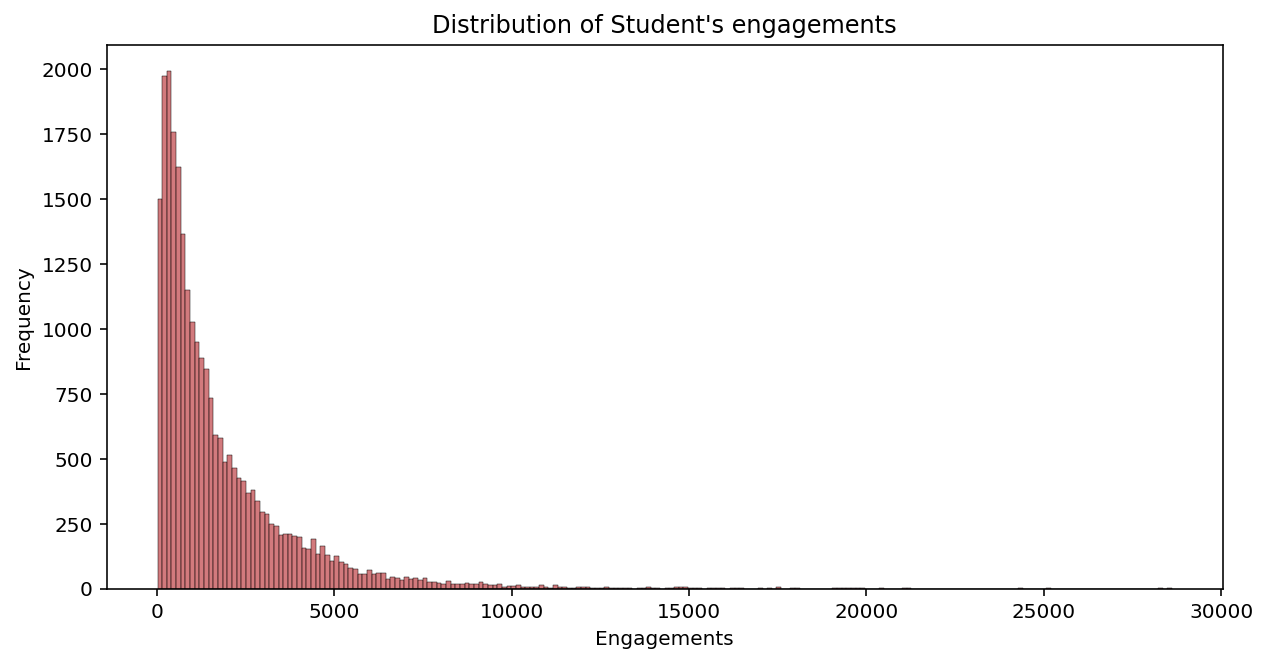

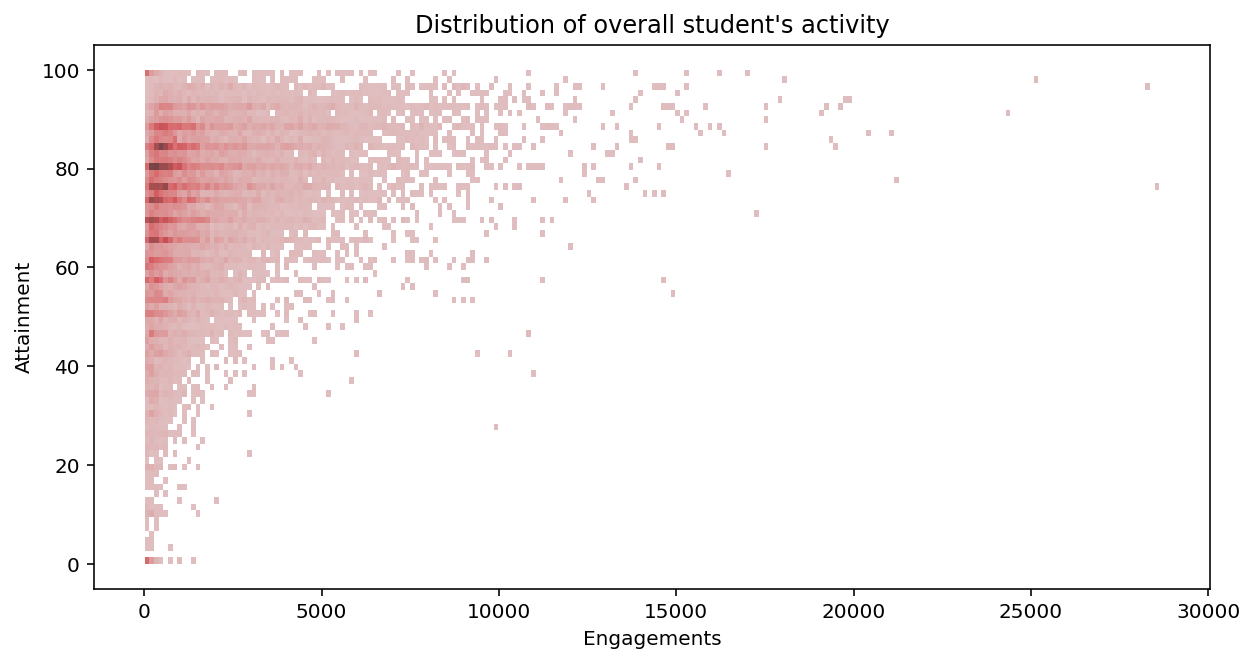

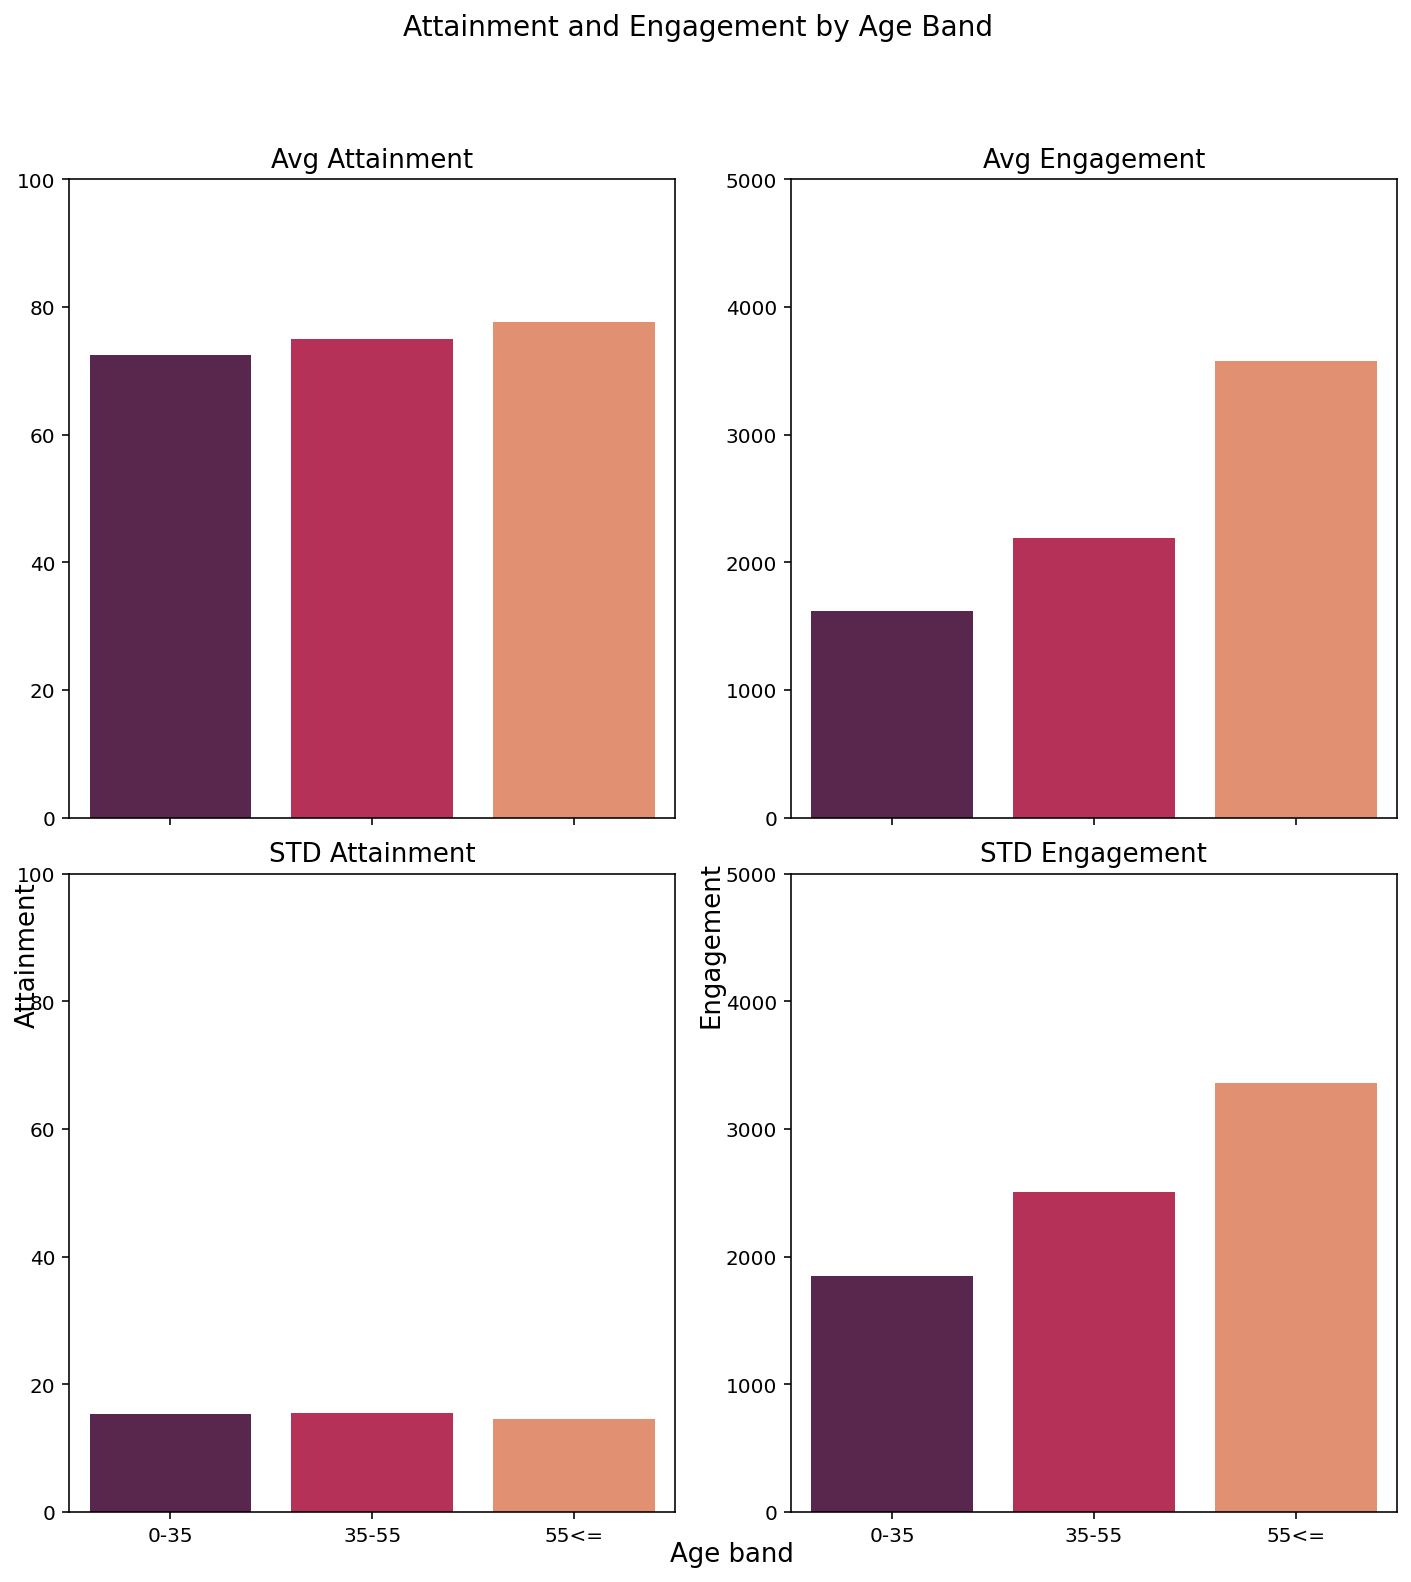

In [11]:
# Setting seaborn style
sns.set_color_codes()

# Distribution of Engagements
plt.figure(figsize=(10,5))
axes = sns.histplot(data=input_data_merged_cleaned,x='click_events',color='r')
axes.set(xlabel="Engagements", ylabel = "Frequency")
plt.title("Distribution of Student's engagements")
plt.show()

# Distribution of overall student's activity
plt.figure(figsize=(10,5))
axes = sns.histplot(data=input_data_merged_cleaned,x='click_events',y='final_mark',color='r')
axes.set(xlabel="Engagements", ylabel = "Attainment")
plt.title("Distribution of overall student's activity")
plt.show()

# Creating grid of subplots
fig, axes = plt.subplots(2, 2, sharex = True, figsize = (10, 10))

# Mean of final_mark
sns.barplot(palette = 'rocket', data = input_data_merged_cleaned,
            x = 'age_band', y = 'final_mark',ax = axes[0, 0], 
             order = sorted(input_data_merged_cleaned['age_band'].unique()),
           linewidth = 0, ci = None)


# Mean of click events
sns.barplot(palette = 'rocket', data = input_data_merged_cleaned,
            x = 'age_band', y = 'click_events',ax = axes[0, 1], 
             order = sorted(input_data_merged_cleaned['age_band'].unique()),
           linewidth = 0, ci = None)


# Standard deviation of final_mark
sns.barplot(palette = 'rocket', data = input_data_merged_cleaned,
            x = 'age_band', y = 'final_mark',ax = axes[1, 0], 
            linewidth = 0, estimator = np.std, 
            order = sorted(input_data_merged_cleaned['age_band'].unique()),
            ci = None)

# Standard deviation of click_events
sns.barplot(palette = 'rocket', data = input_data_merged_cleaned,
            x = 'age_band', y = 'click_events',ax = axes[1, 1], 
            linewidth = 0, estimator = np.std, 
            order = sorted(input_data_merged_cleaned['age_band'].unique()),
            ci = None)


# To remove Overlapping axes
fig.tight_layout()

# Setting axes titles
axes[0, 0].set_title("Avg Attainment", fontsize = 13)
axes[0, 1].set_title("Avg Engagement", fontsize = 13)
axes[1, 0].set_title("STD Attainment", fontsize = 13)
axes[1, 1].set_title("STD Engagement", fontsize = 13)


# Setting axes labels - remove autogenerated labels
for i in range(2):
    for j in range(2):
        axes[i, j].set_xlabel(None)
        axes[i, j].set_ylabel(None)
        
# Resetting labels
fig.text(0.025, 0.4, "Attainment", rotation = 90, fontsize = 13)
fig.text(0.50, 0.4, "Engagement", rotation = 90, fontsize = 13)
fig.text(0.48, 0.025, "Age band", fontsize = 13)

# Setting y-axis limits
for i in range(2):
    axes[i, 0].set_ylim(0, 100)
for j in range(2):
    axes[j, 1].set_ylim(0, 5000)

# Setting y-offset titles
fig.suptitle("Attainment and Engagement by Age Band", fontsize = 14, y = 1.1);

### Requirement FR2.11 - Investigate the effects of engagement on attainment
1. Based on the results from previous two queries, decided to break the data into increments of 5% and group them by age bands and set the minimum and maximum point scale due to large variant to see the behavior.
2. Based on the visualized view of the averaged incremental distribution,
For age-group less than 35, attainment seems to be achieved more with for few engagements.
For age-group between 35 and 55, looks to have same behavior as those below 35 but attainment seems to be lower at earlier stages of engagement.
For age group above 55, the pattern seems to be varied at different areas.
3. The above figure did not satisfy me to tell if this effect differs by age bands. So did a facet grid to check those and suggests that the relationship between differences in attainment and engagement by age group shown in FR2.9 and FR2.10 may be independent of one another.

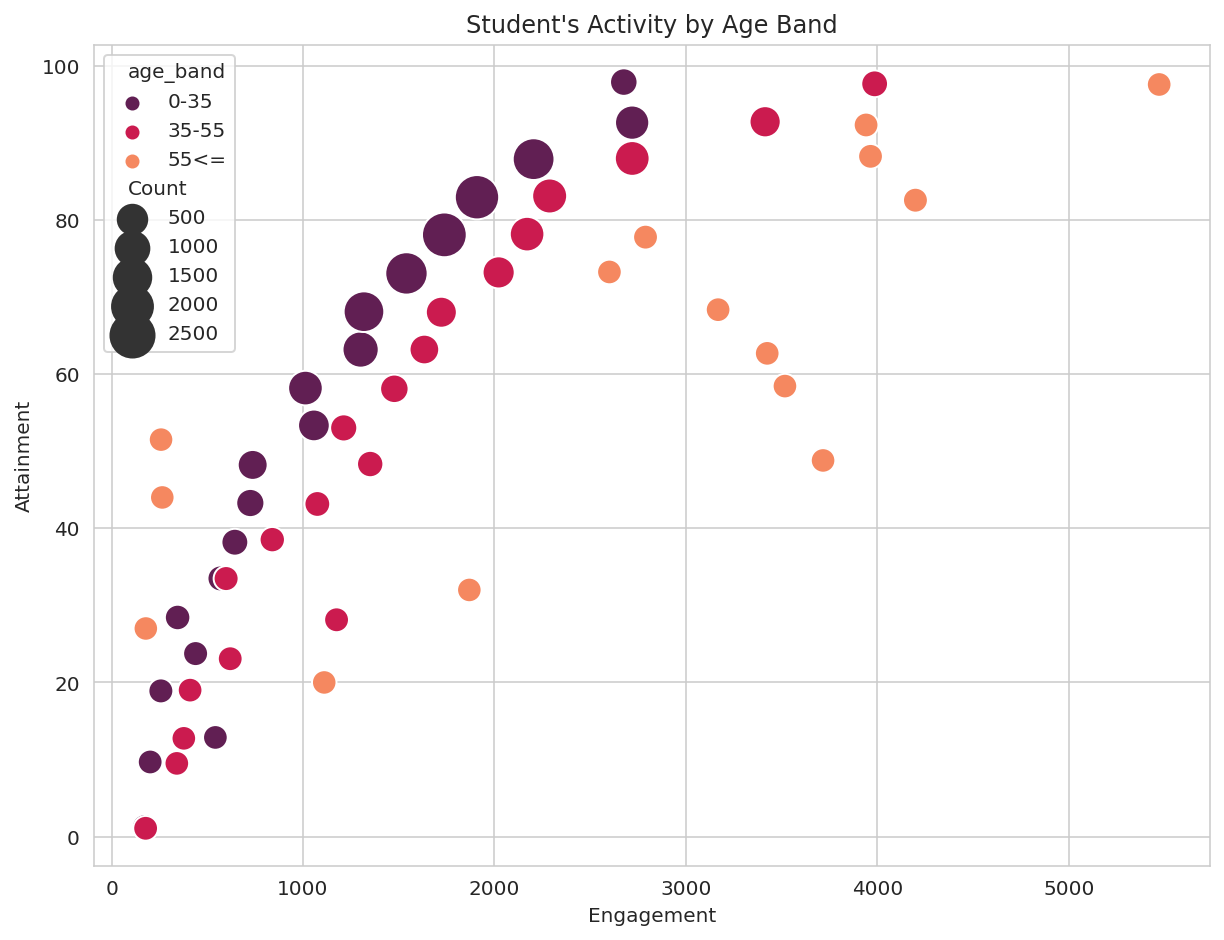

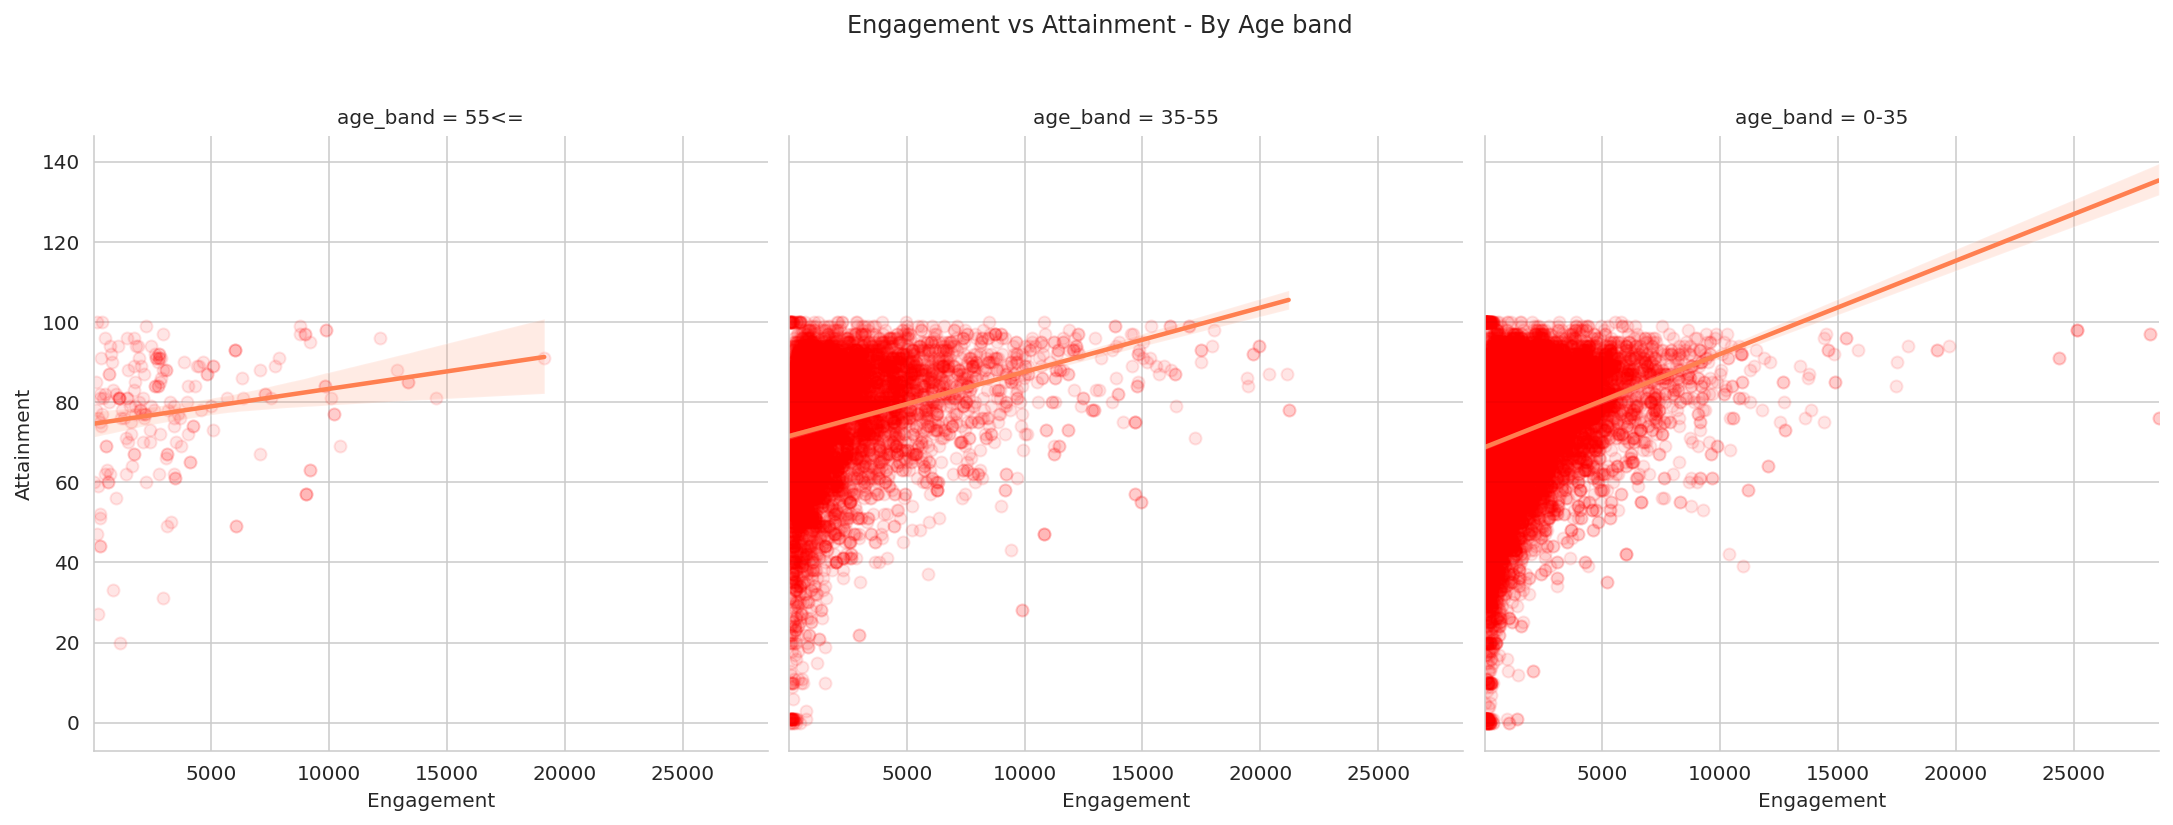

In [12]:
''' Distributing the wide data in increments '''
MarkBins = range(0,150, 5)

input_data_merged_cleanedMean = input_data_merged_cleaned.groupby(['age_band', 
                                                             pd.cut(input_data_merged_cleaned['final_mark'], MarkBins)], 
                                                            as_index=False)[['final_mark','click_events']].mean()

input_data_merged_cleanedMeanCount = input_data_merged_cleaned.groupby(
    ['age_band', pd.cut(input_data_merged_cleaned['final_mark'], MarkBins)],
    as_index=False)[['final_mark']].count().rename(columns={'final_mark':'Count'})

input_data_merged_cleanedMeanAnalysis = pd.merge(input_data_merged_cleanedMean, 
                                              input_data_merged_cleanedMeanCount['Count'],
                                              left_index=True, right_index=True).dropna()

''' Plotting the Averaged incremental distribution '''

sns.set_style("whitegrid")

plt.figure(figsize=(10,7.55))

minsize = 150
maxsize = 500
axes = sns.scatterplot(data=input_data_merged_cleanedMeanAnalysis,
                x='click_events', y='final_mark', hue='age_band',
                size='Count', palette="rocket", legend='auto', sizes=(minsize, maxsize))

axes.set(xlabel="Engagement", ylabel = "Attainment")

plt.title("Student's Activity by Age Band")
plt.show()


''' Plotting the distribution by Age Band '''

axes = sns.lmplot(data = input_data_merged_cleaned, x = 'click_events', y = 'final_mark', col = 'age_band',
               scatter_kws = {'color' : 'red', 'alpha' : 0.1},
               line_kws = {'color' : 'coral'})

axes.set_axis_labels("Engagement", "Attainment")

axes.fig.suptitle("Engagement vs Attainment - By Age band", y = 1.10);

### Requirement FR2.12 - Test the hypothesis that there is a significant effect on attainment
1. Started to check to see hypothesis on effect on attainment.
2. Created natural log of array for engagement data and attainment data.
3. Checked to see the pearson coefficient and rechecked with linear correlation coefficient effects on those data.
4. Turns out, got close to **34% correlation with zero p-value**.
5. We can reject the null hypothesis that there is no effect between Engagement and Attainment but having a **variation by 11.44%**.

In [13]:
'''
Testing hypothesis on effect on attainment
Linear least-squares regression for Engagements and Attainment.
Here, Dependent-Variable - array_attainment, Explanatory-Variable - log_engagement
'''

log_engagement = np.log(np.array(input_data_merged_cleaned['click_events']))
array_attainment = np.array(input_data_merged_cleaned['final_mark'])

r, r_p = stats.pearsonr(log_engagement, array_attainment)
print(f'''Pearson Correlation Coefficient..\n
Correlation: {r:.2f}
p-value: {r_p:.2f}
''')

Pearson Correlation Coefficient..

Correlation: 0.34
p-value: 0.00



Testing hypothesis..

Linear least-squares regression of Attainment on log of Engagement

Standard Error: 0.08
p-value: 0.00
Variation in Attainment by Engagement: 11.44%
Therefore, we can reject null hypothesis that there is no effect between Engagements and Attainment


Text(0, 0.5, 'Residual Values')

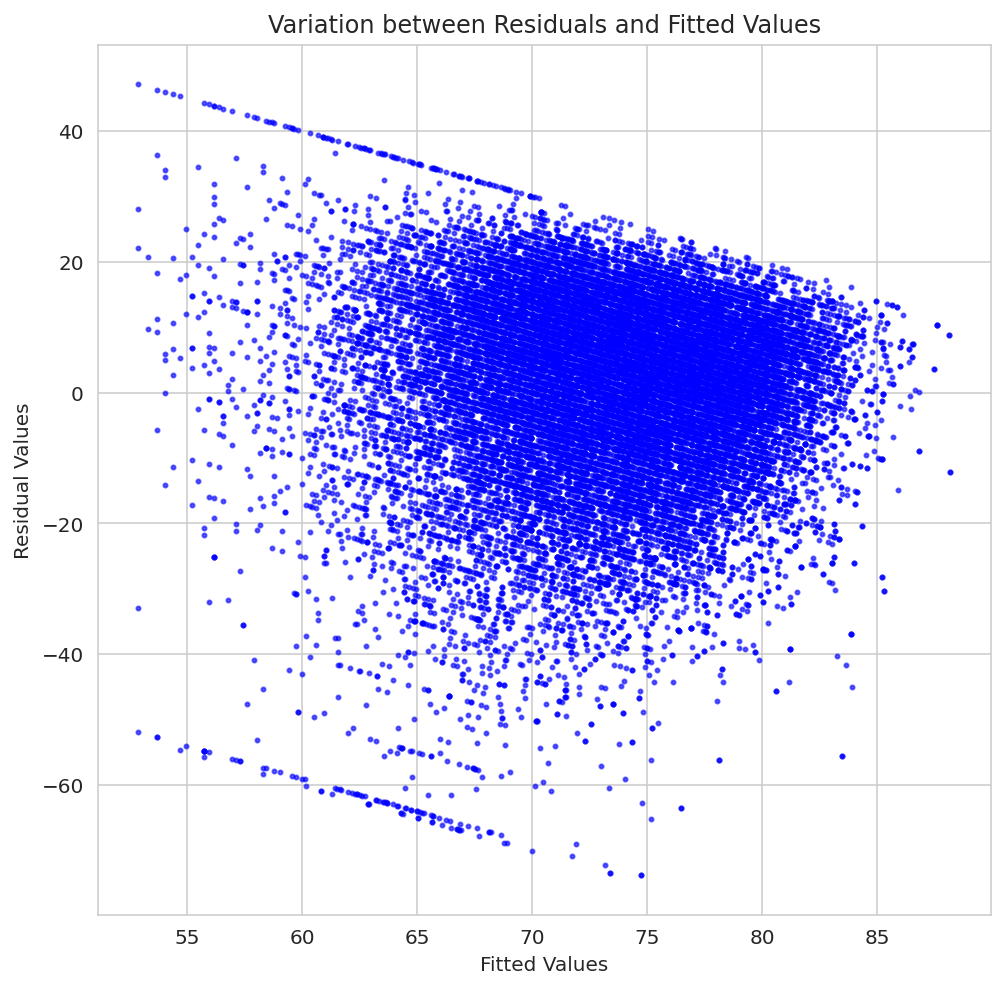

In [14]:
'''
Visualise and Test this assumption
'''

slope, intercept, r, p_value, standard_error = stats.linregress(log_engagement, array_attainment)
print(f'''Testing hypothesis..\n
Linear least-squares regression of Attainment on log of Engagement\n
Standard Error: {standard_error:.2f}
p-value: {p_value:.2f}
Variation in Attainment by Engagement: {(r**2):.2%}
Therefore, we can reject null hypothesis that there is no effect between Engagements and Attainment''')

attainment_predicted_value = intercept + slope * log_engagement
residuals = array_attainment - attainment_predicted_value

fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(attainment_predicted_value, residuals, 'o', markersize = 2, alpha = 0.6, color = 'blue')
axes.set_title("Variation between Residuals and Fitted Values")
axes.set_xlabel("Fitted Values")
axes.set_ylabel("Residual Values")

# Process Development Report for Task 2

**Approach**:
Focused mostly on use of pandas and visualization libraries. Coded following **PEP8** style guide. Made sure to have a check points at every stage before performing a task. Moving on to analysis, I looked at two possible angles to analyse the pattern of the data points to check the variation levels. 

**Improvements / Alternative Approaches**

I could have analysed in more detail to view all the possible angles. Could have embeded multiple plots into one rathar than creating subplots side by side.

**My Experience**:

The queries in the task queries are well organized. It was a **progressively building up and thereby teaching us the art of data preprocessing and analysis**. This journey tuned my python programming skills along the way. Learnt lof of interesting ways to analyse data and map the data efficiently. Overall, it was a wonderful journey of learning experience doing this task. 

**<i>References<i>**:,
1. www.mathsisfun.com,
2. Learning Materials(Programming for Data Science with Python, University of West of England) **By David Wyatt**,
3. Version Control - https://fetstudy.uwe.ac.uk/~di2-wyatt/FVQ/git_tutorial/#intro **By David Wyatt**,
4. Python My Bestie - An Easy and Efficient Way to Learn Python 2020 - **By Er Kumar Anurag**
5. https://elitedatascience.com/python-seaborn-tutorial
6. https://scipy-lectures.org/packages/statistics/index.html